Run model

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [10]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([l0])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
max=1000
history = model.fit(celsius_q, fahrenheit_a, epochs=max, verbose=False)
print("Finished training the model")


-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
Finished training the model


Visualize loss function MSE across every epoch

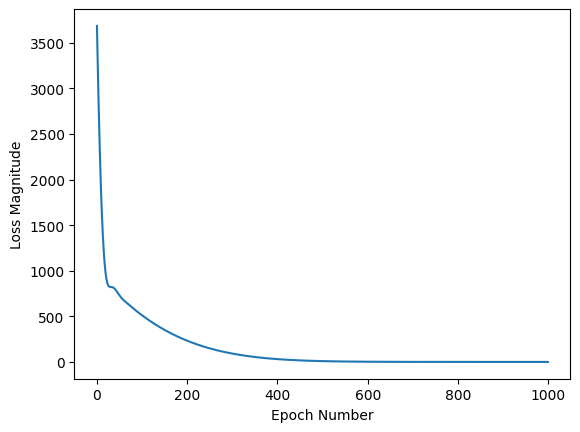

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

In [14]:
check = history.history['loss'][max - 1]
print(check)

0.0640571340918541


prediction for e.g. 100 celsius

In [15]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 73ms/step
[[211.74281]]


In [16]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7982237]], dtype=float32), array([31.920444], dtype=float32)]


In [17]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 93ms/step
[[211.74744]]
1/1 [==============================] - 0s 47ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.24772929, -1.0082498 ,  0.33896807,  0.4056261 ]],
      dtype=float32), array([ 2.3166966, -3.5218258, -2.3753746,  3.5562434], dtype=float32)]
These are the l1 variables: [array([[-1.4011467 , -0.07540332, -0.7033264 ,  0.75538224],
       [ 0.8868747 ,  0.9066154 ,  0.03191719, -0.48437455],
       [ 0.74841636,  0.19172256,  0.82529587,  0.11465262],
       [-0.27862078, -1.086503  , -0.4350321 , -0.05381083]],
      dtype=float32), array([-3.4057202, -3.549777 , -2.3312607,  2.1892507], dtype=float32)]
These are the l2 variables: [array([[-0.82126397],
       [-1.1520476 ],
       [-0.45515975],
       [ 0.35010973]], dtype=float32), array([3.441153], dtype=float32)]
